In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("2_income_KMeans.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [6]:
x = df[['Age','Income($)']]
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
scaled_data

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [8]:
#creating pca columns 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components,columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.298771,-0.618981
1,-0.720766,-0.706399
2,-1.203197,-0.223967
3,-1.342480,-0.329978
4,1.871779,-0.110123
5,1.587016,-0.561242
6,1.915488,-0.399126
7,1.580818,-0.800338
8,1.235711,-0.945818
9,0.680539,-0.635940


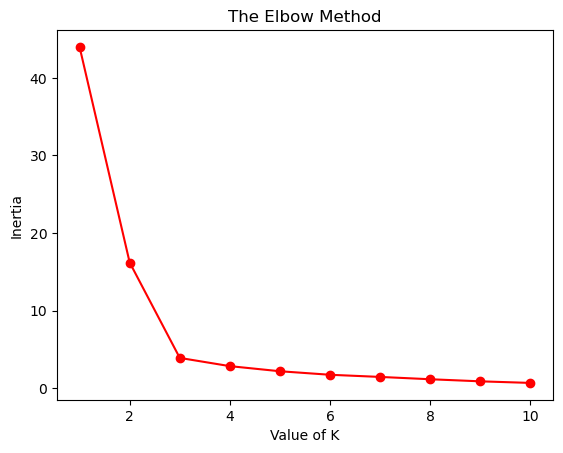

In [9]:
# Determine value of K using inertia
inertia = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit_predict(pd.DataFrame(scaled_data))
    inertia.append(model.inertia_)
plt.plot(range(1,11),inertia,c='r',marker='o')
plt.xlabel('Value of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()


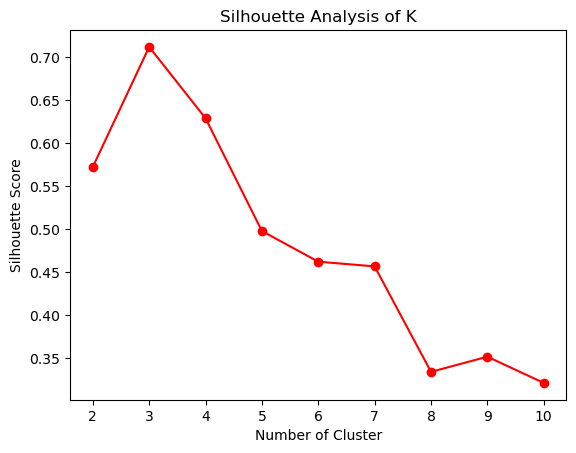

In [10]:
#Using Silhouette_samples
from sklearn.metrics import silhouette_samples
sil_list = []
for i in range(2,11):
    model = KMeans(n_clusters = i)
    sil_list.append(silhouette_samples(scaled_data,model.fit_predict(scaled_data)).mean())
plt.plot(range(2,11),sil_list,c='r',marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis of K')
plt.show()

In [11]:
kmeans_model = KMeans(5)
kmeans_model.fit(scaled_data)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame(kmeans_model.labels_,columns=['Cluster'])],axis=1)

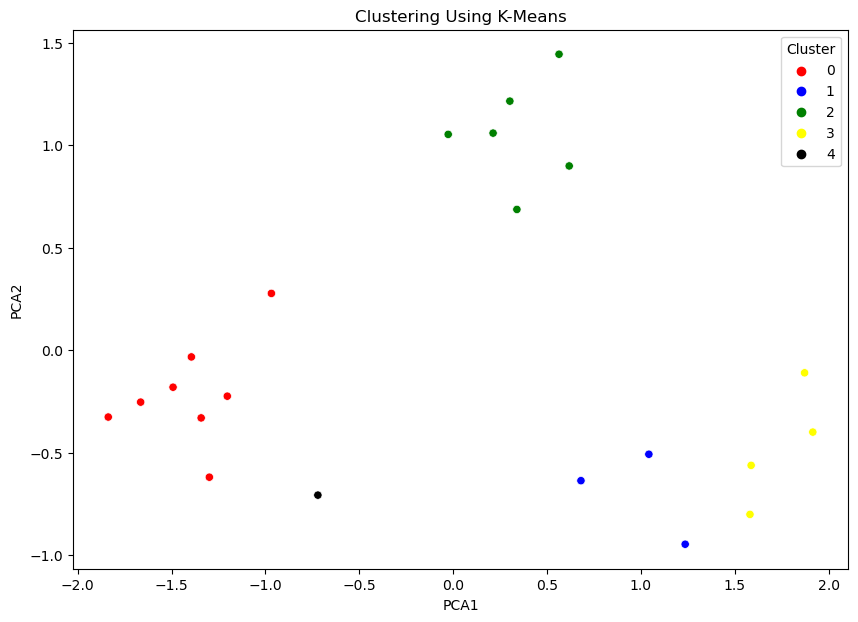

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=pca_df_kmeans,palette=['red','blue','green','yellow','black'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering Using K-Means')
plt.show()

In [13]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,4
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,3
5,Gautam,39,155000,3
6,David,41,160000,3
7,Andrea,38,162000,3
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [23]:
cluster_0_df = cluster_df[cluster_df['Cluster']==0]
cluster_0_df.to_csv("0_Cluster.csv")

In [19]:
cluster_1_df = cluster_df[cluster_df['Cluster']==1]
cluster_1_df.to_csv("1_Cluster.csv")

In [20]:
cluster_2_df = cluster_df[cluster_df['Cluster']==2]
cluster_2_df.to_csv("2_Cluster.csv")

In [21]:
cluster_3_df = cluster_df[cluster_df['Cluster']==3]
cluster_3_df.to_csv("3_Cluster.csv")

In [22]:
cluster_4_df = cluster_df[cluster_df['Cluster']==4]
cluster_4_df.to_csv("4_Cluster.csv")